# Homework 2

## Section 1: Setup

In [ ]:
# Dataset: Kaggle
# The data set contains medical insurance costs 
# Source:
# https://www.kaggle.com/datasets/mirichoi0218/insurance
# https://www.kaggle.com/datasets/mirichoi0218/insurance/download?datasetVersionNumber=1

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('insurance.csv')

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
data_points = [
{'age': 18, 'bmi': 30.0, 'charges': 1111.0, },
{'age': 19, 'bmi': 24.0, 'charges': 2111.5, },
{'age': 20, 'bmi': 25.0, 'charges': 7111.0, },
{'age': 21, 'bmi': 23.0, 'charges': 4111.5, },
{'age': 22, 'bmi': 26.0, 'charges': 5111.8, }
]

## Section 2: Simple Linear Regression

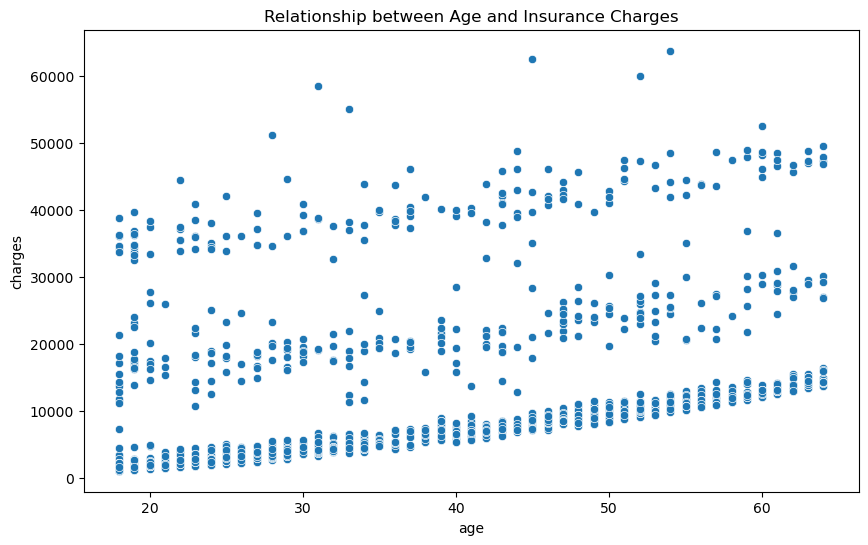

In [46]:
X = data['age']
y = data['charges']

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Relationship between Age and Insurance Charges')
plt.show()

In [48]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           4.89e-29
Time:                        19:39:30   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Observations:
# Intercept coefficient: 2165.8850
# Age coefficient: 254.7226. For every one-unit increase in age, the insurance costs are expected to increase by
# approximately $254.72 units
# R-squared: 0.089. This suggests that approximately 8.9% of the variability  in the dependent variable, insurance costs,
# can be explained by the model. In simpler terms, the model captures over half of the
# variability in insurance costs (charges) using age as a predictor.

## Section 3: Multicollinearity

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

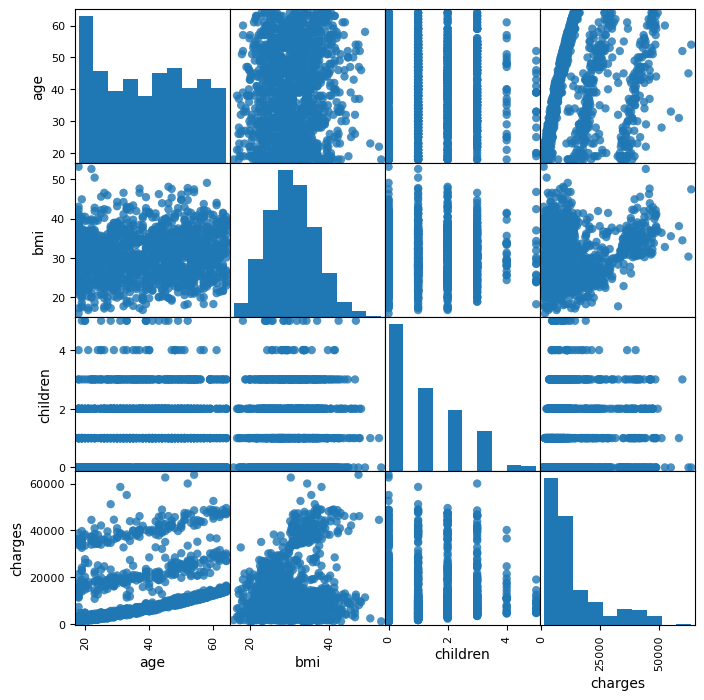

In [55]:
selected_predictors = ['age', 'bmi', 'children', 'charges', 'smoker']
X = data[selected_predictors]
pd.plotting.scatter_matrix(X, figsize=(8, 8), alpha=0.8, marker='o',diagonal='hist')

In [57]:
# Visual Observations:
# - bmi: Displays a possible correlation with both insurance costs and age.
# - age: Seems to correlate with charges and bmi.
# - charges: Indicates a potential correlation with age and bmi.

In [78]:
X_numeric = X.select_dtypes(include=[np.number])  

X_filled = X_numeric.fillna(0)  # Or X_numeric.fillna(X.mean())

X_dropped = X_numeric.dropna()

X_no_inf = X_filled.replace([np.inf, -np.inf], np.nan).fillna(0) 

X_final = X_no_inf.astype(float)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(X_final.shape[1]):
    vif = variance_inflation_factor(X_final.values, i)
    print(f"VIF for {X_final.columns[i]}: \t{vif:10.3f}")

VIF for age: 	     8.098
VIF for bmi: 	     8.044
VIF for children: 	     1.800
VIF for charges: 	     2.474


## Section 4: Multiple Linear Regression

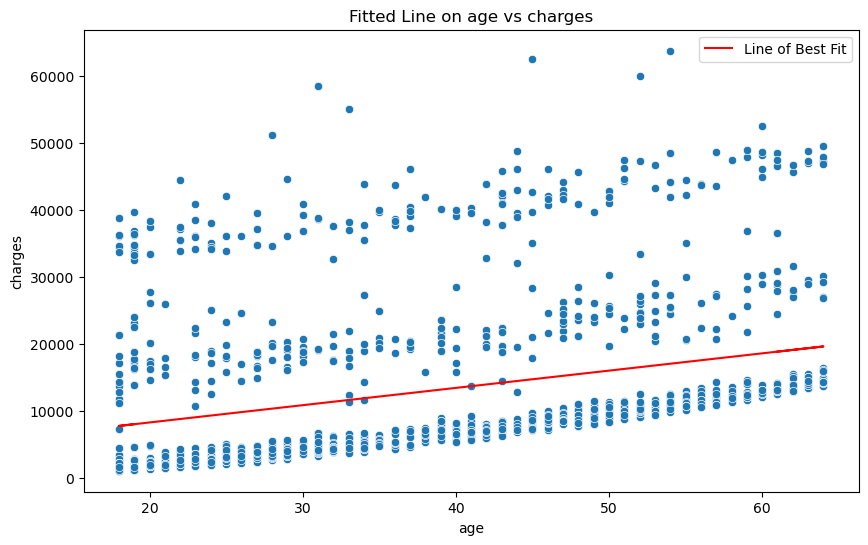

In [99]:
age_values = []
for point in data_points:
    age_values.append(point['age'])

beta_1 = model.params['age']
beta_0 = model.params['const']

charge_values = beta_0 + beta_1 * np.array(lstat_values)

plt.figure(figsize=(10,6))
sns.scatterplot(x=data['age'], y=data['charges'])

plt.plot(data['age'], beta_0 + beta_1 * data['age'], color='red',
    label="Line of Best Fit")

sns.scatterplot(x=lstat_values, y=medv_values, color='black', s=100,
    label="Evaluation Points")

plt.title('Fitted Line on age vs charges')
plt.legend()
plt.show()

In [105]:
X = pd.DataFrame(data[['age', 'bmi','charges','children']])
y = data['charges']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.193e+33
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:08:24   Log-Likelihood:                 32996.
No. Observations:                1338   AIC:                        -6.598e+04
Df Residuals:                    1333   BIC:                        -6.596e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.082e-12   7.35e-13      4.194      0.000    1.64e-12    4.52e-12
age         1.199e-14   9.66e-15      1.241      0.215   -6.96e-15    3.09e-14
bmi         -4.13e-14   2.17e-14     -1.906      0.057   -8.38e-14     1.2e-15
charges        1.0000   1.14e-17   8.79e+16      0.000       1.000       1.000
children   -1.137e-13   1.08e-13     -1.057      0.291   -3.25e-13    9.73e-14
==============================================================================
Omnibus:                      472.843   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1309.031
Skew:                           1.867   Prob(JB):                    5.59e-285
Kurtosis:                       6.088   Cond. No.                     1.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:

age_values = []
bmi_values = []
children_values = []
charges_values = []
for point in data_points:
    age_values.append(point['age'])
    bmi_values.append(point['bmi'])
    charges_values.append(point['charges'])

beta_0 = model.params['const']
beta_age = model.params['age']
beta_bmi = model.params['bmi']
beta_charges = model.params['charges']

age_values = (beta_0 + beta_age * np.array(age_values) + beta_bmi * np.array(bmi_values) + beta_charges * np.array(charges_values))

for i, (age, bmi, children, charges,) in enumerate(zip(age_values, bmi_values, children_values, charges_values,)):
    print(np.array(age_values).shape)
print(np.array(bmi_values).shape)
print(np.array(charges_values).shape)
print(beta_age, beta_bmi, beta_children, beta_charges)



(5,)
(5,)
1.199040866595169e-14 -4.1300296516055823e-14 -1.1368683772161603e-13 0.9999999999999997
